# Computing attractors with network reduction

In this notebook we introduce a simple attractor detection workflow based on the reduction technique studied in [1].

However, note that this method is not the same as the one in [1]. For now, this is just a prototype that hasn't been extensively validated. There are most likely many improvements that can be made.

[1] Tonello, Elisa, and Loïc Paulevé. "Attractor identification in asynchronous Boolean dynamics with network reduction." arXiv preprint arXiv:2305.01327 (2023).

In [19]:
from biodivine_aeon import *
import graphviz

In [20]:
bn = BooleanNetwork.from_file("butanol-pathway-fixed-inputs.aeon")
bn = bn.inline_inputs()
bn

BooleanNetwork(variables = 66, parameters = 0, regulations = 139)

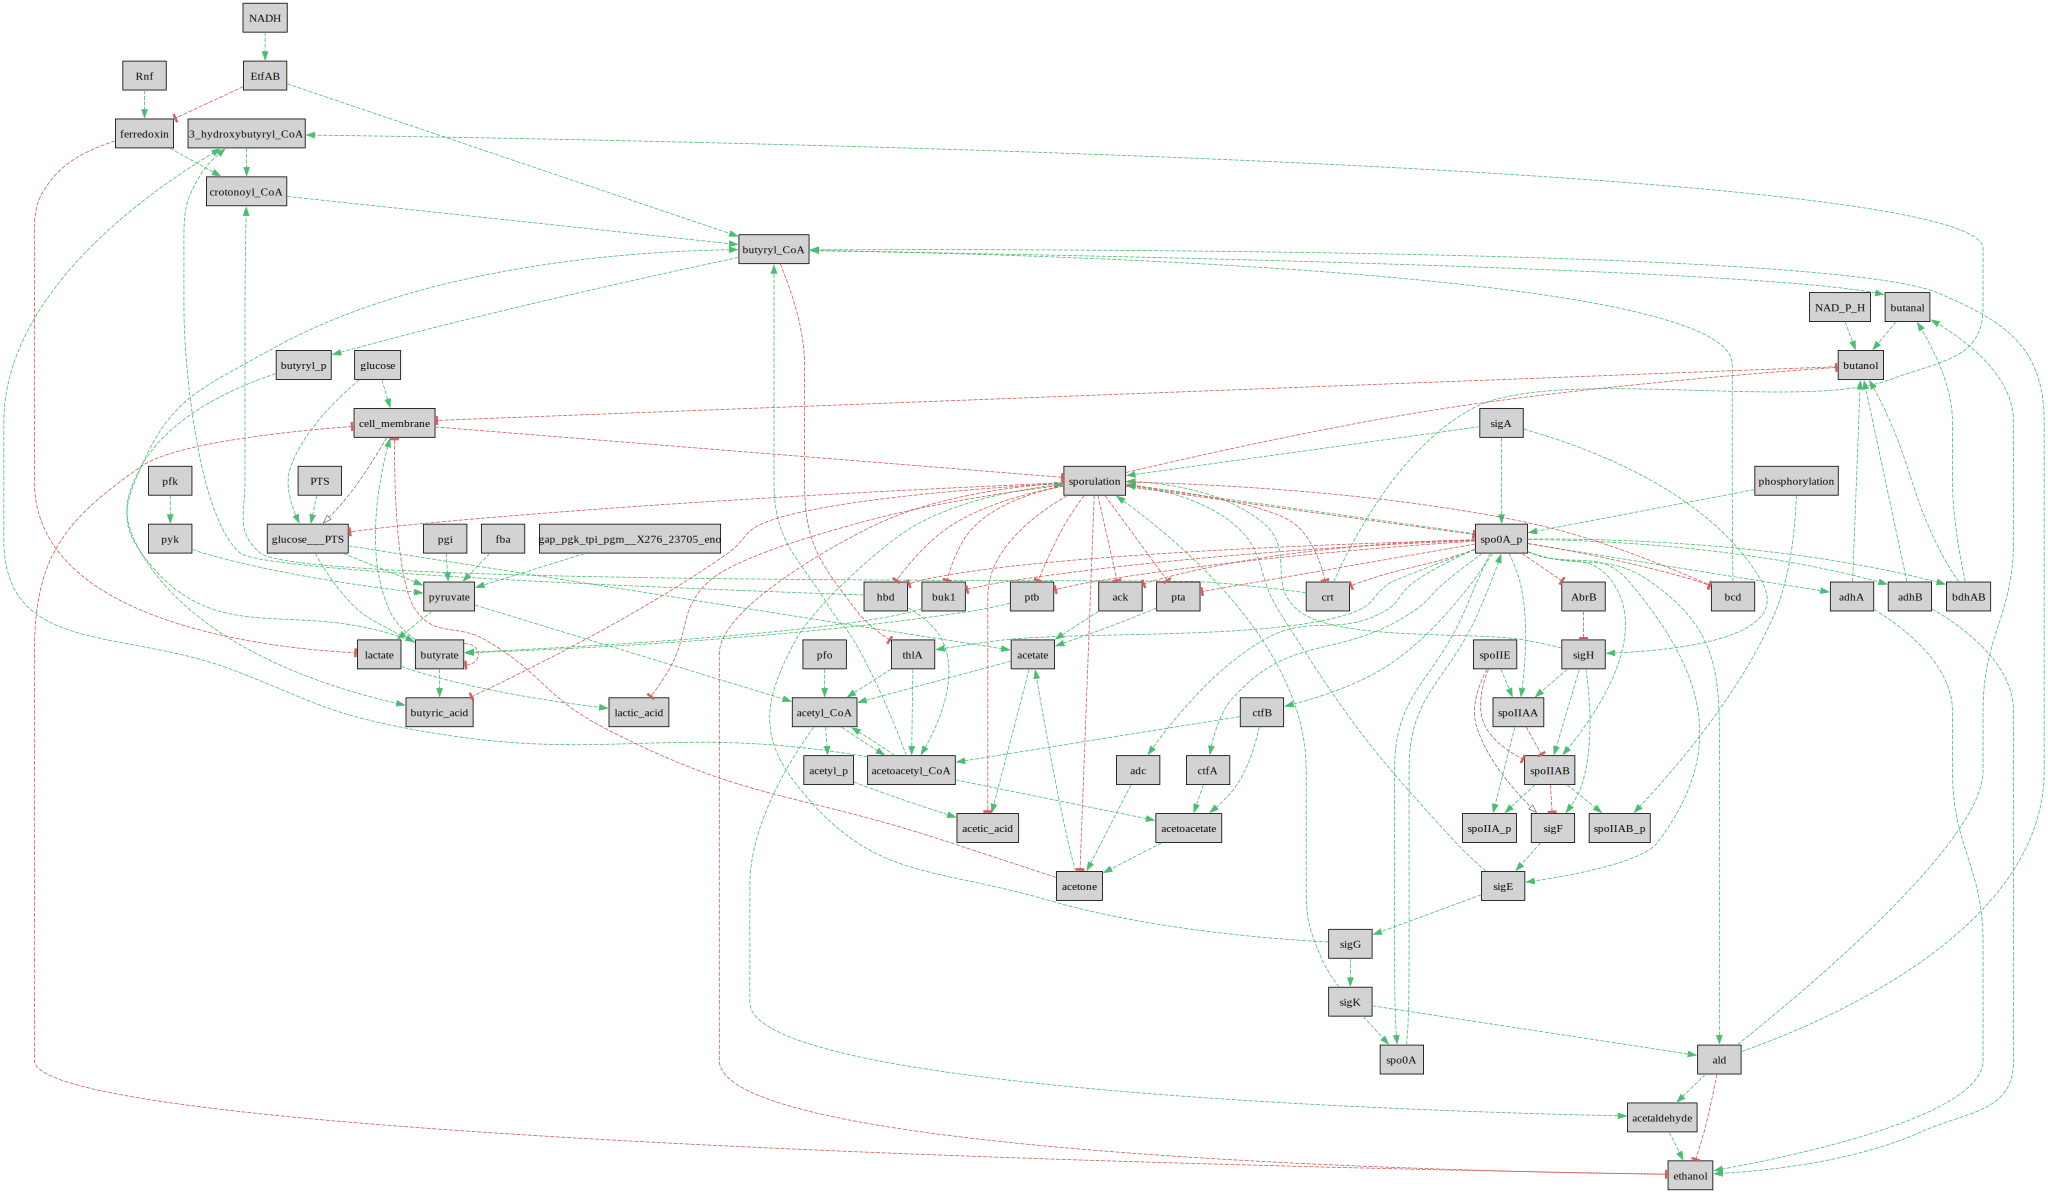

In [21]:
graphviz.Source(bn.graph().to_dot())

In [22]:
print(find_attractors(SymbolicAsyncGraph(bn)))

[ColoredVertexSet(cardinality = 27262976, unique vertices = 27262976, unique colors = 1)]


In [23]:
def reduce_and_search(network, variables):
    """
        Compute the set of attractor states by first reducing the network
        based on the given list of variables.
    """
    stg = SymbolicAsyncGraph(network)
    
    # If there are no more variables to reduce, just compute attractors.
    if len(variables) == 0:
        print(f"Reduced attractor detection on `{network}`.")
        return (stg, find_attractors(stg))
    
    # Otherwise, try to reduce network (this can fail if there are 
    # uninterpreted functions or self-regulation).
    reduced_network = network.inline_variable(variables[0])
    reduced_network = reduced_network.infer_regulatory_graph()
    if reduced_network is None:
        raise f"Cannot reduce network variable {variables[0]}."
    (reduced_stg, reduced_attractors) = reduce_and_search(reduced_network, variables[1:])

    attractors = []
    for attractor in reduced_attractors:
        attractor_candidate = stg.transfer_from(attractor, reduced_stg)
        attractor = stg.trap_forward(attractor_candidate)
        print(f"Reduced attractor candidate {attractor_candidate} to {attractor}")
        if not attractor.is_empty():
            attractors.append(attractor)
    return (stg, attractors)

In [26]:
# First, we reduce network outputs, then just some "core" variables,
# but this is mostly a relatively random process just for demonstration.
reduction = [
    "ethanol",
    "spoIIA_p",
    "spoIIAB_p",
    "acetyl_p",
    "butyric_acid",
    "acetic_acid",
    "lactic_acid",
    "butyryl_p",
    "acetone",
    "lactate",
    "spoIIAA",
    "spoIIAB",
    "pyruvate",
    "pyk",
    "ack",
    "bdhAB",
    "thlA",
    "ctfB",
    "sigG",
    "ptb",
    "buk1",
    "ald",
    "adc",
    "ctfA",
    "EtfAB",
    "ferredoxin",
    "crotonoyl_CoA",
    "adhA",
    "adhB",
    "crt",
    "sigF",
    "sigE",
    "acetoacetate",
    "sporulation",
]
len(reduction)

34

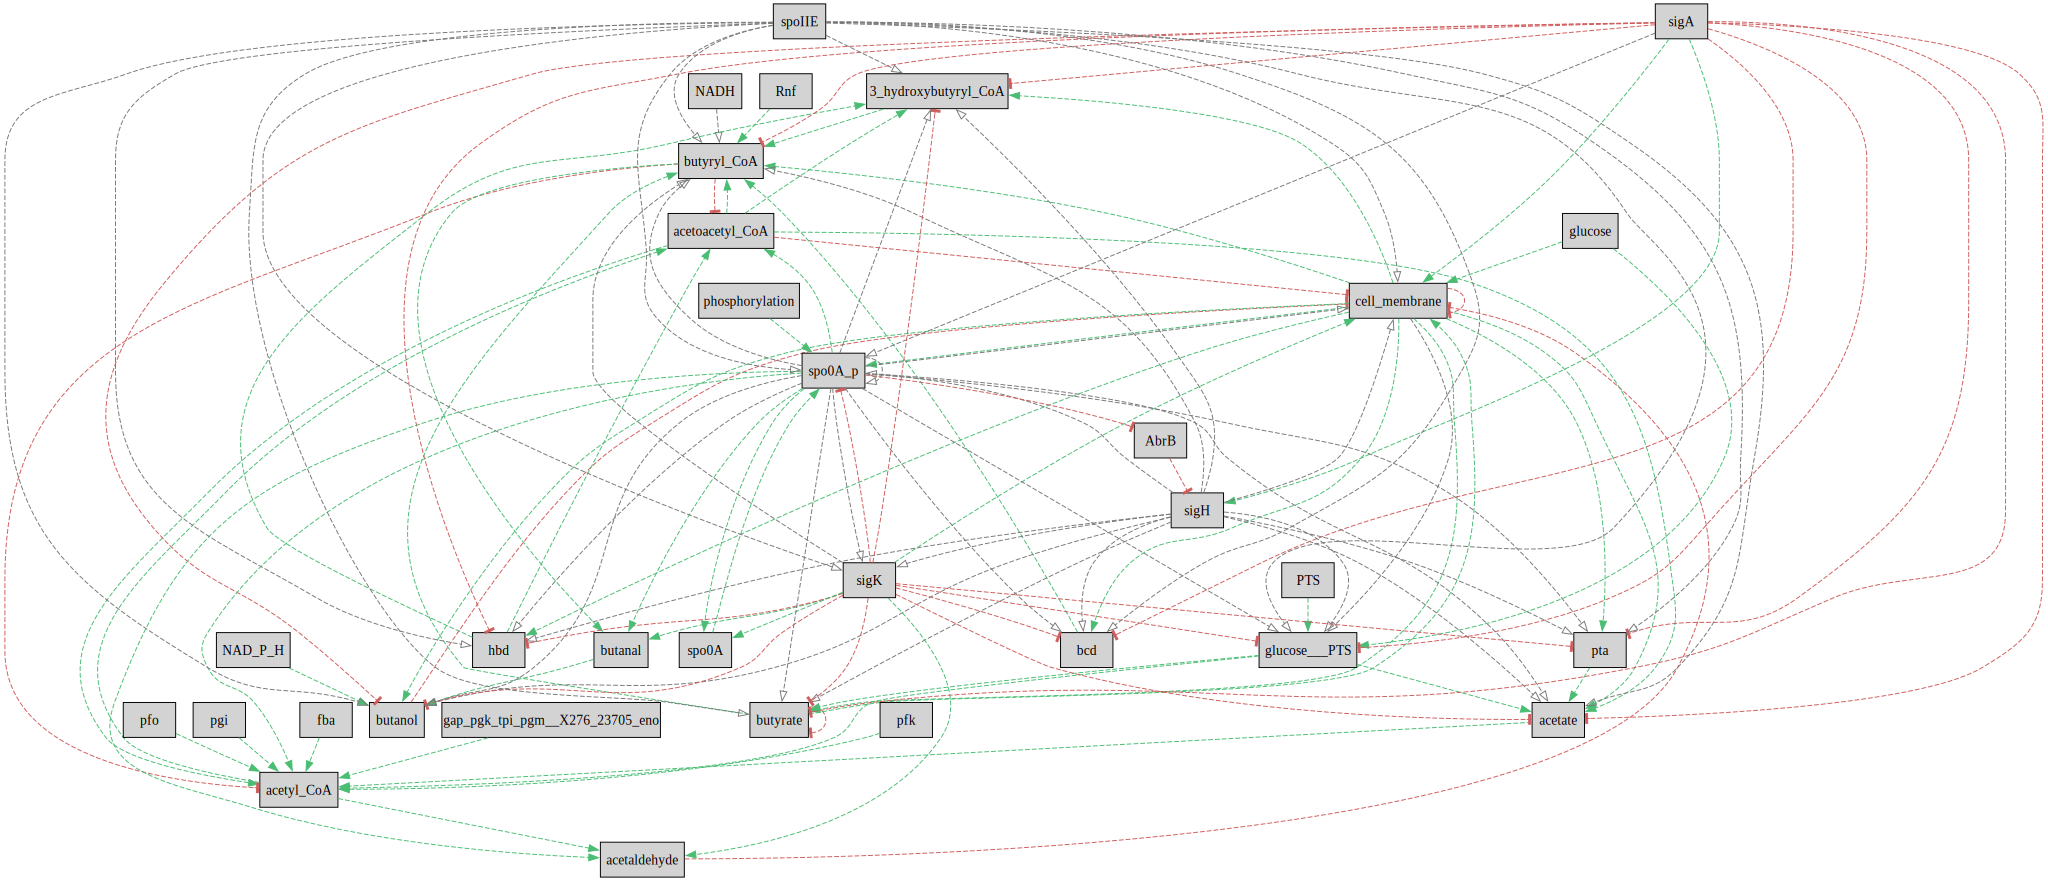

In [27]:
# The reduced network will look like this:
reduced = bn
for var in reduction: 
    reduced = reduced.inline_variable(var)
graphviz.Source(reduced.graph().to_dot())

In [8]:
reduced

BooleanNetwork(variables = 19, parameters = 13, regulations = 82)

In [28]:
reduce_and_search(bn, reduction)

Reduced attractor detection on `BooleanNetwork(variables = 32, parameters = 0, regulations = 109)`.
Reduced attractor candidate ColoredVertexSet(cardinality = 2048, unique vertices = 2048, unique colors = 1) to ColoredVertexSet(cardinality = 2048, unique vertices = 2048, unique colors = 1)
Reduced attractor candidate ColoredVertexSet(cardinality = 4096, unique vertices = 4096, unique colors = 1) to ColoredVertexSet(cardinality = 4096, unique vertices = 4096, unique colors = 1)
Reduced attractor candidate ColoredVertexSet(cardinality = 8192, unique vertices = 8192, unique colors = 1) to ColoredVertexSet(cardinality = 4096, unique vertices = 4096, unique colors = 1)
Reduced attractor candidate ColoredVertexSet(cardinality = 8192, unique vertices = 8192, unique colors = 1) to ColoredVertexSet(cardinality = 4096, unique vertices = 4096, unique colors = 1)
Reduced attractor candidate ColoredVertexSet(cardinality = 8192, unique vertices = 8192, unique colors = 1) to ColoredVertexSet(cardinal

(<SymbolicAsyncGraph at 0x119b13960>,
 [ColoredVertexSet(cardinality = 1924145348608, unique vertices = 1924145348608, unique colors = 1)])